# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from citipy import citipy
import os
import csv
plt.rcParams["figure.figsize"] = [10, 5]

# Import API key
from api_keys import api_key


# Output File (CSV)
output_data_file = os.path.join("/Users/admin/Documents/Data_Analytics_Class/api-challenge/weather.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1700)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1700)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


670

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

#printing out an example to get keys
weather = requests.get(query_url + "Vienna").json()
print(json.dumps(weather, indent=4, sort_keys=True))


{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 48.21,
        "lon": 16.37
    },
    "dt": 1571956194,
    "id": 2761369,
    "main": {
        "humidity": 72,
        "pressure": 1014,
        "temp": 54.63,
        "temp_max": 60.01,
        "temp_min": 50
    },
    "name": "Vienna",
    "rain": {},
    "sys": {
        "country": "AT",
        "id": 6878,
        "sunrise": 1571981293,
        "sunset": 1572018528,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 4.7
    }
}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
city_number = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count_1 = 1

for city in cities:
    try:
        weather_data = requests.get(query_url + city).json()
        city_name.append(weather_data["name"])
        cloudiness.append(weather_data["clouds"]["all"])
        country.append(weather_data["sys"]["country"])
        date.append(weather_data["dt"])
        humidity.append(weather_data["main"]["humidity"])
        lat.append(weather_data["coord"]["lat"])
        lng.append(weather_data["coord"]["lon"])
        max_temp.append(weather_data["main"]["temp_max"])
        wind_speed.append(weather_data["wind"]["speed"])
        print("City number " + str(count_1) + " | " + weather_data["name"])
    except:
        print("City not found. Skipping...")
    time.sleep(1.5)
    count_1 = count_1 + 1
    #city_number.append(index)
    

City number 1 | Ponta do Sol
City number 2 | Jamestown
City number 3 | Bandundu
City number 4 | Airai
City number 5 | Kapaa
City number 6 | Tuktoyaktuk
City number 7 | Kavaratti
City number 8 | Atuona
City not found. Skipping...
City number 10 | Tajimi
City number 11 | Rikitea
City not found. Skipping...
City number 13 | Mataura
City number 14 | Punta Arenas
City number 15 | Aksay
City number 16 | Saint-Joseph
City number 17 | Cape Town
City number 18 | Saint-Philippe
City number 19 | Port Alfred
City number 20 | Albany
City number 21 | Dikson
City number 22 | Ushuaia
City number 23 | Teya
City number 24 | Labuhan
City number 25 | Auki
City number 26 | Karratha
City number 27 | Lata
City number 28 | Hithadhoo
City number 29 | Pueblo Nuevo
City number 30 | Westport
City number 31 | Tuatapere
City number 32 | Bilma
City number 33 | Coihaique
City number 34 | Ilulissat
City number 35 | Busselton
City number 36 | Lebu
City number 37 | Saldanha
City number 38 | Bluff
City number 39 | Carnar

City number 303 | Kieta
City number 304 | Oneida
City number 305 | Namatanai
City number 306 | Vasterhaninge
City number 307 | Uruzgan
City number 308 | Broken Hill
City not found. Skipping...
City number 310 | Milkovo
City number 311 | Esmeraldas
City number 312 | Abilene
City number 313 | Opuwo
City number 314 | Chokurdakh
City number 315 | Havoysund
City number 316 | Santa Cruz
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City number 320 | Rancho Palos Verdes
City number 321 | Najran
City number 322 | Valdivia
City number 323 | Samarkand
City number 324 | Kamsack
City number 325 | Norman Wells
City number 326 | Dengzhou
City not found. Skipping...
City number 328 | Wuwei
City number 329 | Uvinza
City number 330 | San Vicente
City number 331 | Vuktyl
City number 332 | Ravar
City number 333 | Shingu
City number 334 | Sur
City number 335 | Bathsheba
City number 336 | Nyuksenitsa
City number 337 | Carmen
City not found. Skipping...
City number 339 

City number 601 | Phan Thiet
City number 602 | Podgornoye
City number 603 | Mao
City number 604 | Calama
City not found. Skipping...
City number 606 | Bubaque
City number 607 | Isangel
City number 608 | Lobito
City number 609 | Komsomolskiy
City number 610 | Kalemie
City number 611 | Gamba
City number 612 | Wasilla
City number 613 | Birmensdorf
City number 614 | Casas Grandes
City number 615 | Wajima
City number 616 | San Patricio
City number 617 | Ferkessedougou
City number 618 | Avera
City number 619 | Pakxan
City number 620 | Yinchuan
City number 621 | Kiunga
City number 622 | Wanaka
City number 623 | Ruwi
City number 624 | Nipawin
City not found. Skipping...
City number 626 | Savannah Bight
City number 627 | Ouallam
City number 628 | Pochutla
City number 629 | Corn Island
City number 630 | Ulagan
City number 631 | Chiredzi
City number 632 | Ornskoldsvik
City number 633 | Bonthe
City number 634 | Hay River
City number 635 | Weatherford
City number 636 | Donskoye
City number 637 | To

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
##the first time I tried to make a csv file, I wanted to save this code in case I need it later on

#zipped_data = zip(city_name, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed)
#with open(output_data_file, "w", newline="") as datafile:
 #   writer = csv.writer(datafile)
  #  writer.writerow(["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Long","Max Temp","Wind Speed"])
   # writer.writerows(zipped_data)
 

In [34]:
zipped_data = zip(city_name, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed)
weather_df = pd.DataFrame(zipped_data)


#view dataframe
weather_df.head()

,0,1,2,3,4,5,6,7,8
0,Ponta do Sol,30,BR,1571957084,86,-20.63,-46.00,68.92,2.33
1,Jamestown,10,AU,1571956797,42,-33.21,138.60,59.81,17.78
2,Bandundu,20,CD,1571957087,96,-3.32,17.38,70.90,1.19
3,Airai,72,TL,1571957089,33,-8.93,125.41,78.30,5.06
4,Kapaa,1,US,1571957091,74,22.08,-159.32,84.20,8.05


In [35]:
city_weather_df = weather_df.rename(columns={0:"City",1:"Cloudiness",2:"Country",3:"Date",4:"Humidity",
                                            5:"Latitude",6:"Longitude", 7:"Max Temp", 8:"Wind Speed"})

city_weather_df.to_csv(output_data_file)

city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Ponta do Sol,30,BR,1571957084,86,-20.63,-46.00,68.92,2.33
1,Jamestown,10,AU,1571956797,42,-33.21,138.60,59.81,17.78
2,Bandundu,20,CD,1571957087,96,-3.32,17.38,70.90,1.19
3,Airai,72,TL,1571957089,33,-8.93,125.41,78.30,5.06
4,Kapaa,1,US,1571957091,74,22.08,-159.32,84.20,8.05


In [14]:
city_weather_df.count()

City          606
Cloudiness    606
Country       606
Date          606
Humidity      606
Latitude      606
Longitude     606
Max Temp      606
Wind Speed    606
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

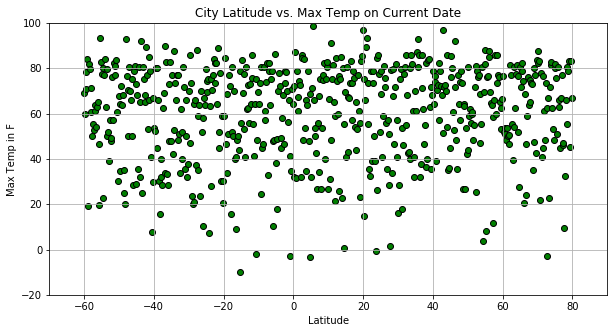

In [43]:
x_axis = np.arange(-60,80,(140/(city_weather_df["City"].count())))
temps = city_weather_df["Max Temp"]
plt.scatter(x_axis, temps, marker="o", facecolors="green", edgecolors="black")
plt.ylim(-20,100)
plt.xlim(-70,90)
ticks = [-60, -40, -20, 0, 20, 40, 60, 80]
xticks = [value for value in ticks]
plt.xticks(xticks)
plt.title("City Latitude vs. Max Temp on Current Date")
plt.xlabel("Latitude")
plt.ylabel("Max Temp in F")
plt.grid()
plt.savefig("/Users/admin/Documents/Data_Analytics_Class/api-challenge/latitudevstemp_scatter.png")
plt.show()

#### Latitude vs. Humidity Plot

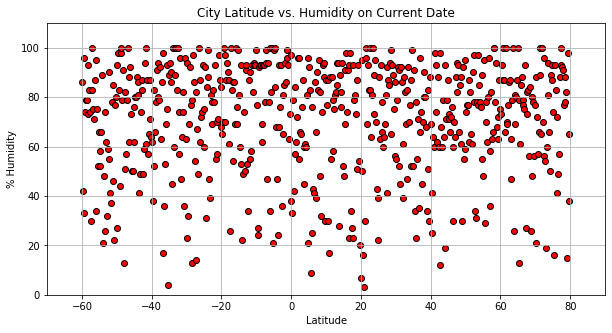

In [44]:
x_axis = np.arange(-60,80,(140/(city_weather_df["City"].count())))
humidity = city_weather_df["Humidity"]
plt.scatter(x_axis, humidity, marker="o", facecolors="red", edgecolors="black")
plt.ylim(0,105)
plt.xlim(-70,90)
ticks = [-60, -40, -20, 0, 20, 40, 60, 80]
xticks = [value for value in ticks]
plt.xticks(xticks)
plt.title("City Latitude vs. Humidity on Current Date")
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.ylim(0,110)
plt.grid()
plt.savefig("/Users/admin/Documents/Data_Analytics_Class/api-challenge/latitudevshumidity_scatter.png")
plt.show()

# Latitude vs. Cloudiness Plot

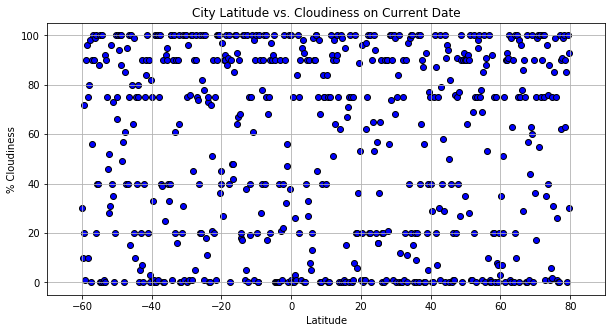

In [45]:
x_axis = np.arange(-60,80,(140/(city_weather_df["City"].count())))
clouds = city_weather_df["Cloudiness"]
plt.scatter(x_axis, clouds, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(-5,105)
plt.xlim(-70,90)
ticks = [-60, -40, -20, 0, 20, 40, 60, 80]
xticks = [value for value in ticks]
plt.xticks(xticks)
plt.title("City Latitude vs. Cloudiness on Current Date")
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.grid()
plt.savefig("/Users/admin/Documents/Data_Analytics_Class/api-challenge/latitudevsclouds_scatter.png")
plt.show()

#### Latitude vs. Wind Speed Plot

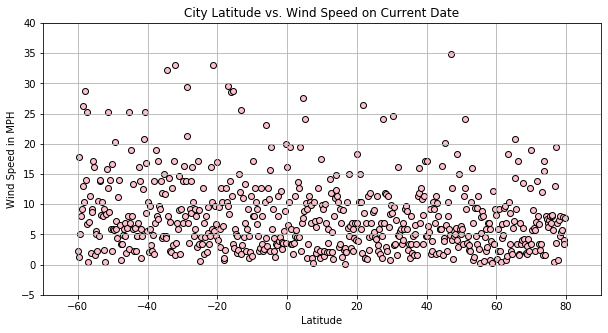

In [46]:
x_axis = np.arange(-60,80,(140/(city_weather_df["City"].count())))
wind = city_weather_df["Wind Speed"]
plt.scatter(x_axis, wind, marker="o", facecolors="pink", edgecolors="black")
ticks = [-60, -40, -20, 0, 20, 40, 60, 80]
xticks = [value for value in ticks]
plt.xticks(xticks)
plt.ylim(-5,40)
plt.xlim(-70,90)
plt.title("City Latitude vs. Wind Speed on Current Date")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed in MPH")
plt.grid()
plt.savefig("/Users/admin/Documents/Data_Analytics_Class/api-challenge/latitudevswind_scatter.png")
plt.show()

In [ ]:
#3 observable trends gathered from the above data

#Fom these scatter plots we can gather that there are a far greater number of cities on earth with high (above 60 degrees)
#max temps and high humidity (above 60%), than low max temps and low humidity. In genergal we can conclude that
#on this current date the weather across the world is trending towards higher temperatures and higher humidity.

#We can also conclude that most cities tend to have a high percentage of cloudiness, or almost no cloudiness, there
# are fewer data points in the 20-60% range of cloudiness, which could be categorized as medium. We can deduce
# that the trend is to have a completely overcast day, or very few clouds in the sky. 

#From the last scatter plot (latitude vs. wind speed) we can conclude that it is very rare to see wind speeds above
#15 mph. The wind speed trend is much more skewed to speeds at or below 10 mph. 